<a href="https://colab.research.google.com/github/prog815/lernDLpython/blob/master/tutorials_keras_overfit_and_underfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Знакомимся с переобучением и недообучением

Енин А.В.

Оренбург

26.08.2019

[VK](https://vk.com/alekseyenin)
[OK](http://ok.ru/profile/404477133)
[Twitter](https://twitter.com/EninAleksey)
[FB](https://www.facebook.com/alex.prog.1)
[Telegramm](https://t.me/AleseyEnin)
[Habr](https://habr.com/ru/users/eavprog/posts/)
[VC](https://vc.ru/u/262921-aleksey-enin)
[GitHub](https://github.com/prog815/lernDLpython)

Образец

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


# Загружаем датасет IMDB

In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Создаем матрицу формы (len(sequences), dimension), состоящую из нулей
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # назначаем единицу на конкретные показатели results[i]
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
train_data.shape

(25000, 10000)

In [4]:
train_labels.shape

(25000,)

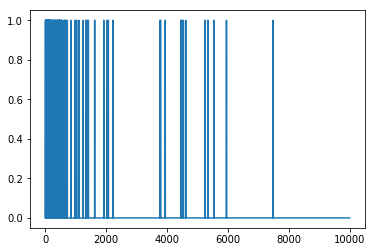

In [5]:
plt.plot(train_data[0])

# Продемонстрируем переобучение

## Строим основу для модели

In [6]:
baseline_model = keras.Sequential([
    # Параметр `input_shape` нужен только для того, чтобы заработал `.summary`
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

W0826 12:15:18.141753 139772686309248 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0826 12:15:18.263719 139772686309248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5138 - acc: 0.7898 - binary_crossentropy: 0.5138 - val_loss: 0.3662 - val_acc: 0.8680 - val_binary_crossentropy: 0.3662
Epoch 2/20
25000/25000 - 3s - loss: 0.2696 - acc: 0.9061 - binary_crossentropy: 0.2696 - val_loss: 0.2893 - val_acc: 0.8856 - val_binary_crossentropy: 0.2893
Epoch 3/20
25000/25000 - 3s - loss: 0.1937 - acc: 0.9314 - binary_crossentropy: 0.1937 - val_loss: 0.2864 - val_acc: 0.8856 - val_binary_crossentropy: 0.2864
Epoch 4/20
25000/25000 - 3s - loss: 0.1555 - acc: 0.9461 - binary_crossentropy: 0.1555 - val_loss: 0.3082 - val_acc: 0.8789 - val_binary_crossentropy: 0.3082
Epoch 5/20
25000/25000 - 3s - loss: 0.1268 - acc: 0.9576 - binary_crossentropy: 0.1268 - val_loss: 0.3286 - val_acc: 0.8760 - val_binary_crossentropy: 0.3286
Epoch 6/20
25000/25000 - 3s - loss: 0.1046 - acc: 0.9675 - binary_crossentropy: 0.1046 - val_loss: 0.3577 - val_acc: 0.8723 - val_binary_crossentropy: 0.3577
Ep

# Создаем малый вариант

In [8]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

smaller_model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [9]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6039 - acc: 0.7793 - binary_crossentropy: 0.6039 - val_loss: 0.5154 - val_acc: 0.8462 - val_binary_crossentropy: 0.5154
Epoch 2/20
25000/25000 - 3s - loss: 0.4249 - acc: 0.8840 - binary_crossentropy: 0.4249 - val_loss: 0.3944 - val_acc: 0.8738 - val_binary_crossentropy: 0.3944
Epoch 3/20
25000/25000 - 3s - loss: 0.3191 - acc: 0.9058 - binary_crossentropy: 0.3191 - val_loss: 0.3341 - val_acc: 0.8816 - val_binary_crossentropy: 0.3341
Epoch 4/20
25000/25000 - 3s - loss: 0.2588 - acc: 0.9194 - binary_crossentropy: 0.2588 - val_loss: 0.3028 - val_acc: 0.8866 - val_binary_crossentropy: 0.3028
Epoch 5/20
25000/25000 - 3s - loss: 0.2204 - acc: 0.9298 - binary_crossentropy: 0.2204 - val_loss: 0.2891 - val_acc: 0.8878 - val_binary_crossentropy: 0.2891
Epoch 6/20
25000/25000 - 3s - loss: 0.1941 - acc: 0.9367 - binary_crossentropy: 0.1941 - val_loss: 0.2829 - val_acc: 0.8890 - val_binary_crossentropy: 0.2829
Ep

# Создаем большую модель

In [10]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [11]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.3425 - acc: 0.8576 - binary_crossentropy: 0.3425 - val_loss: 0.2942 - val_acc: 0.8805 - val_binary_crossentropy: 0.2942
Epoch 2/20
25000/25000 - 4s - loss: 0.1428 - acc: 0.9480 - binary_crossentropy: 0.1428 - val_loss: 0.3364 - val_acc: 0.8701 - val_binary_crossentropy: 0.3364
Epoch 3/20
25000/25000 - 4s - loss: 0.0453 - acc: 0.9873 - binary_crossentropy: 0.0453 - val_loss: 0.4659 - val_acc: 0.8692 - val_binary_crossentropy: 0.4659
Epoch 4/20
25000/25000 - 4s - loss: 0.0068 - acc: 0.9985 - binary_crossentropy: 0.0068 - val_loss: 0.5927 - val_acc: 0.8697 - val_binary_crossentropy: 0.5927
Epoch 5/20
25000/25000 - 4s - loss: 0.0011 - acc: 0.9999 - binary_crossentropy: 0.0011 - val_loss: 0.6853 - val_acc: 0.8690 - val_binary_crossentropy: 0.6853
Epoch 6/20
25000/25000 - 4s - loss: 6.4900e-04 - acc: 0.9999 - binary_crossentropy: 6.4900e-04 - val_loss: 0.7226 - val_acc: 0.8708 - val_binary_crossentropy: 0

# Построим графики потерь

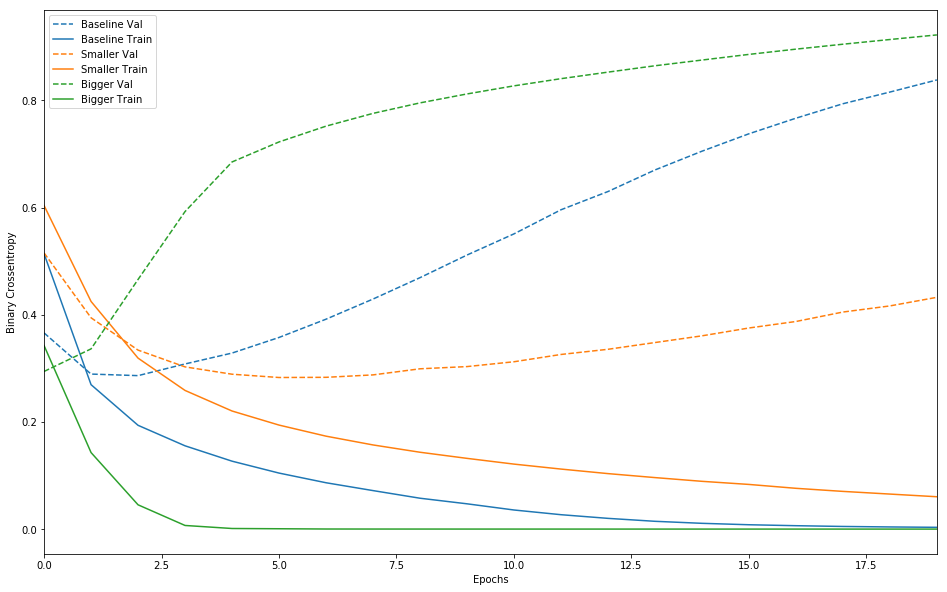

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

переобучение

# Как решить проблему переобучения?

## Добавить регуляризацию весов

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.5378 - acc: 0.8038 - binary_crossentropy: 0.5006 - val_loss: 0.3857 - val_acc: 0.8737 - val_binary_crossentropy: 0.3455
Epoch 2/20
25000/25000 - 3s - loss: 0.3086 - acc: 0.9055 - binary_crossentropy: 0.2634 - val_loss: 0.3350 - val_acc: 0.8876 - val_binary_crossentropy: 0.2862
Epoch 3/20
25000/25000 - 3s - loss: 0.2544 - acc: 0.9291 - binary_crossentropy: 0.2031 - val_loss: 0.3358 - val_acc: 0.8860 - val_binary_crossentropy: 0.2828
Epoch 4/20
25000/25000 - 3s - loss: 0.2303 - acc: 0.9388 - binary_crossentropy: 0.1755 - val_loss: 0.3526 - val_acc: 0.8800 - val_binary_crossentropy: 0.2966
Epoch 5/20
25000/25000 - 3s - loss: 0.2141 - acc: 0.9468 - binary_crossentropy: 0.1570 - val_loss: 0.3646 - val_acc: 0.8774 - val_binary_crossentropy: 0.3065
Epoch 6/20
25000/25000 - 3s - loss: 0.2018 - acc: 0.9519 - binary_crossentropy: 0.1428 - val_loss: 0.3768 - val_acc: 0.8762 - val_binary_crossentropy: 0.3173
Ep

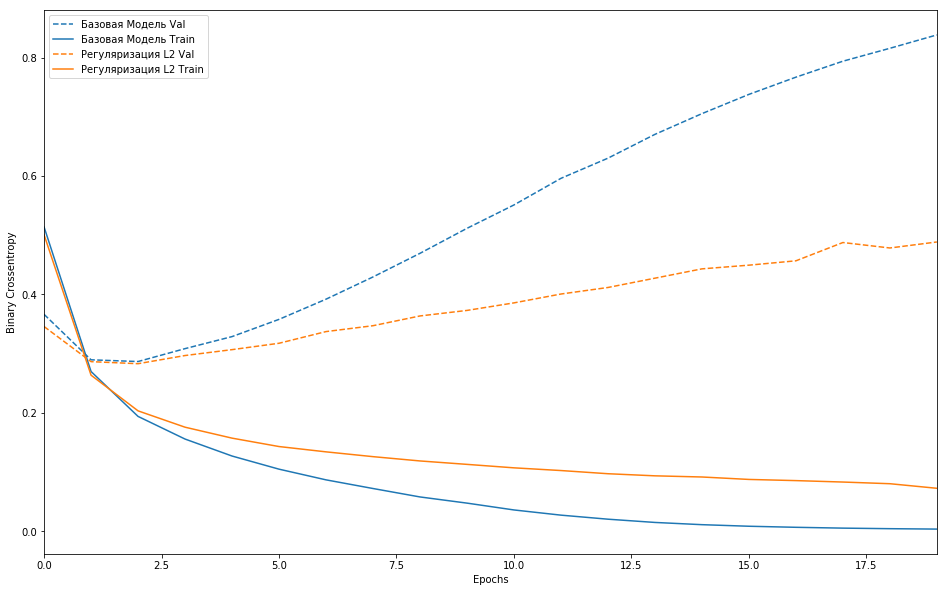

In [14]:
plot_history([('Базовая модель', baseline_history),
              ('Регуляризация L2', l2_model_history)])

## Добавить исключение Dropout

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6153 - acc: 0.6536 - binary_crossentropy: 0.6153 - val_loss: 0.4602 - val_acc: 0.8564 - val_binary_crossentropy: 0.4602
Epoch 2/20
25000/25000 - 3s - loss: 0.4442 - acc: 0.8114 - binary_crossentropy: 0.4442 - val_loss: 0.3302 - val_acc: 0.8820 - val_binary_crossentropy: 0.3302
Epoch 3/20
25000/25000 - 3s - loss: 0.3373 - acc: 0.8721 - binary_crossentropy: 0.3373 - val_loss: 0.2860 - val_acc: 0.8872 - val_binary_crossentropy: 0.2860
Epoch 4/20
25000/25000 - 3s - loss: 0.2786 - acc: 0.9012 - binary_crossentropy: 0.2786 - val_loss: 0.2729 - val_acc: 0.8883 - val_binary_crossentropy: 0.2729
Epoch 5/20
25000/25000 - 3s - loss: 0.2336 - acc: 0.9224 - binary_crossentropy: 0.2336 - val_loss: 0.2791 - val_acc: 0.8881 - val_binary_crossentropy: 0.2791
Epoch 6/20
25000/25000 - 3s - loss: 0.2081 - acc: 0.9299 - binary_crossentropy: 0.2081 - val_loss: 0.2895 - val_acc: 0.8831 - val_binary_crossentropy: 0.2895
Ep

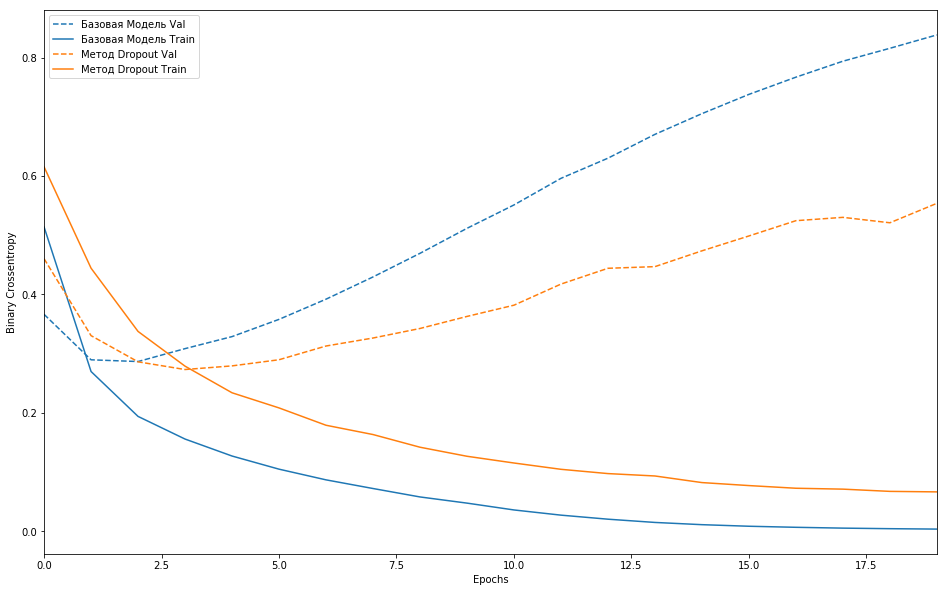

In [16]:
plot_history([('Базовая модель', baseline_history),
              ('Метод Dropout', dpt_model_history)])